# Лабораторная работа №5 - Создания алгоритма планирования пути методом потенциального поля
### Абрамов Максим Витальевич R4134с
### Цель:
> Реализовать алгоритм планирования пути методом потенциального поля для обхода препятствий и движения к цели в двумерном пространстве.
### Задачи:
 1. Определить рабочее пространство, задав начальную и конечную точки, а также препятствия в двумерной среде.
 2. Реализовать функции построения потенциального поля.
 3. Вычислить суммарное потенциальное поле и применить градиентный спуск для нахождения оптимального пути.
 4. Обеспечить визуализацию потенциального поля и траектории движения для анализа результатов.
 5. Провести тестирование алгоритма на препятствий.


### 1. Создание рабочего пространства с начальной и конечной точками и препятствиями.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [43]:
# Начальная и конечная точки
start_point = (0, 0)
goal_point = (10, 10)

# Список препятствий
obstacles = [
    (3, 3, 1.5),
    (5, 6, 1.0),
    (7, 2, 1.2),
    (8, 8, 1.0),
    (2, 6, 1.0),
    (8, 5, 1.5)
]

### 2. Реализация функций построения потенциального поля

In [44]:
# Параметры потенциального поля
attractive_gain = 200.0
repulsive_gain = 40.0
repulsive_range = 5.0

In [45]:
# Функция притягивающего потенциала
def attractive_potential(pos, goal, gain):
    return 0.5 * gain * np.linalg.norm(pos - goal)**2

# Функция отталкивающего потенциала
def repulsive_potential(pos, obstacles, gain, r_range):
    total = 0.0
    for obs in obstacles:
        obs_pos = np.array(obs[:2])
        radius = obs[2]
        dist = np.linalg.norm(pos - obs_pos)
        eff_dist = dist - radius
        if eff_dist <= r_range:
            eff_dist = max(eff_dist, 0.01)
            total += 0.5 * gain * (1 / eff_dist - 1 / r_range) ** 2
    return total

# Функция суммирования двух разных потенциалов
def total_potential(pos, goal, obstacles, att_gain, rep_gain, rep_range):
    return (attractive_potential(pos, goal, att_gain) +
            repulsive_potential(pos, obstacles, rep_gain, rep_range))

### 3. Градиенты потенциального поля

In [46]:
# Градиент притягивающего потенциала
def attractive_gradient(pos, goal, gain):
    return gain * (pos - goal)

# Градиент отталкивающего потенциала
def repulsive_gradient(pos, obstacles, gain, r_range):
    grad = np.zeros(2)
    for obs in obstacles:
        obs_pos = np.array(obs[:2])
        radius = obs[2]
        dist = np.linalg.norm(pos - obs_pos)
        eff_dist = dist - radius
        if eff_dist <= r_range:
            eff_dist = max(eff_dist, 0.01)
            term = -(1 / eff_dist - 1 / r_range) / eff_dist**3
            grad += gain * term * (pos - obs_pos) / dist
    return grad

# Суммарный градиент
def total_gradient(pos, goal, obstacles, att_gain, rep_gain, rep_range):
    return (attractive_gradient(pos, goal, att_gain) +
            repulsive_gradient(pos, obstacles, rep_gain, rep_range))

### 4. Алгоритм построения траектории

In [47]:
def plan_path(start, goal, obstacles, att_gain, rep_gain, rep_range,
              step_size=0.1, max_steps=1000, threshold=0.1):
    pos = np.array(start, dtype=np.float64)
    goal = np.array(goal, dtype=np.float64)
    path = [pos.copy()]

    for _ in range(max_steps):
        if np.linalg.norm(pos - goal) < threshold:
            break

        # Вычисление градиента
        grad = total_gradient(pos, goal, obstacles, att_gain, rep_gain, rep_range)
        norm = np.linalg.norm(grad)
        if norm > 0:
            grad /= norm

        # Обновление позиции
        pos = pos - step_size * grad
        path.append(pos.copy())

    return np.array(path)

### 5. Визуализация пути и потенциального поля

In [48]:
def visualize_path(start, goal, obstacles, path):
    plt.figure(figsize=(10, 8))
    plt.plot(start[0], start[1], 'go', markersize=10, label='Start')
    plt.plot(goal[0], goal[1], 'ro', markersize=10, label='Goal')

    for obs in obstacles:
        circle = Circle(obs[:2], obs[2], color='gray', alpha=0.5)
        plt.gca().add_patch(circle)

    plt.plot(path[:, 0], path[:, 1], 'b-', linewidth=2, label='Path')
    plt.plot(path[:, 0], path[:, 1], 'b.', markersize=5)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Планирование пути методом потенциального поля')
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()

### Результат работы

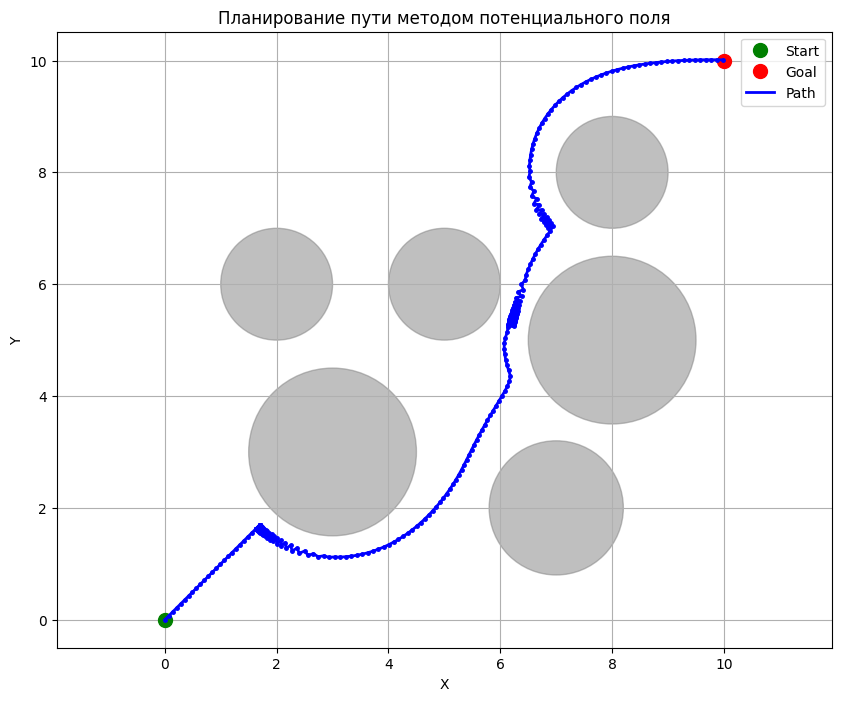

Длина пути: 273 точек
Финальная точка: [ 9.97564385 10.01110256]
Расстояние до цели: 0.0268


In [49]:
path = plan_path(start_point, goal_point, obstacles,
                 att_gain=attractive_gain,
                 rep_gain=repulsive_gain,
                 rep_range=repulsive_range)

visualize_path(start_point, goal_point, obstacles, path)

print(f"Длина пути: {len(path)} точек")
print(f"Финальная точка: {path[-1]}")
print(f"Расстояние до цели: {np.linalg.norm(path[-1] - np.array(goal_point)):.4f}")

 ## Выводы о проделанной работе:
> В ходе выполнения лабораторной работы был успешно реализован алгоритм планирования пути методом потенциального поля. Этот метод продемонстрировал свою эффективность в нахождении оптимального пути для движения робота в двумерном пространстве с препятствиями.
> 
> Алгоритм показал хорошую сходимость и способность обходить препятствия, что подтверждается визуализацией представленной выше. Однако в некоторых случаях, особенно при наличии локальных минимумов, метод может требовать дополнительной доработки, например, введения случайных возмущений или комбинации с другими методами планирования.